In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md
import scipy
import scipy.optimize

# %connect_info

In [2]:
!head -5 circuitLab_simulation_20200719_181405z.csv

Time,V(NODE2),
0,5.816749542313327e-14,
1.0000000000000001e-7,0.00006561862614358301,
2.0000000000000002e-7,0.00013708213951236825,
3.0000000000000004e-7,0.00020890470644833613,


In [3]:
df = pd.read_csv("circuitLab_simulation_20200719_181405z.csv",usecols=[0,1])
df

,Time,V(NODE2)
0,0.000000e+00,5.816750e-14
1,1.000000e-07,6.561863e-05
2,2.000000e-07,1.370821e-04
3,3.000000e-07,2.089047e-04
4,4.000000e-07,2.805658e-04
5,5.000000e-07,3.520141e-04
6,6.000000e-07,4.232426e-04
7,7.000000e-07,4.942485e-04
8,8.000000e-07,5.650297e-04
9,9.000000e-07,6.355838e-04


(9999,)

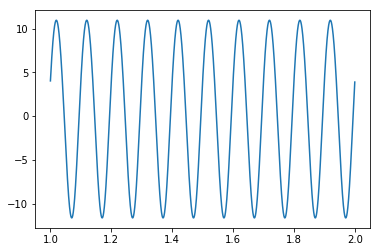

In [4]:
cut = "Time>=1.0e-3"
t = df.query(cut).get("Time")
v = df.query(cut).get("V(NODE2)")
t *= 1.0e3  # measure time in milliseconds
v *= 1.0e3  # measure voltage in millivolts
plt.plot(t,v)
t.shape

In [5]:
func = lambda tvalue: np.interp(tvalue, t, v)
result = scipy.optimize.root(func, x0=1.1)
print(result)
t0 = result.x[0]
result = scipy.optimize.root(func, x0=1.9)
print(result)
t1 = result.x[0]
print("t0={:.3f}ms, t1={:.3f}ms".format(t0,t1))

    fjac: array([[-1.]])
     fun: array([-6.5499689e-14])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([6.5499689e-14])
       r: array([-723.6212808])
  status: 1
 success: True
       x: array([1.09432769])
    fjac: array([[-1.]])
     fun: array([6.36470043e-14])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-6.36470043e-14])
       r: array([-723.62264046])
  status: 1
 success: True
       x: array([1.89432791])
t0=1.094ms, t1=1.894ms


cut = Time>0.0010943276859163777 and Time<0.001894327910710729


(8000,)

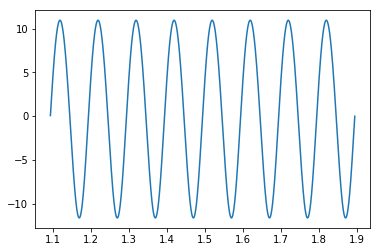

In [6]:
cut = "Time>{} and Time<{}".format(t0*1.0e-3, t1*1.0e-3)
print("cut =", cut)
t = df.query(cut).get("Time")
v = df.query(cut).get("V(NODE2)")
t *= 1.0e3  # measure time in milliseconds
v *= 1.0e3  # measure voltage in millivolts
plt.plot(t,v)
t.shape

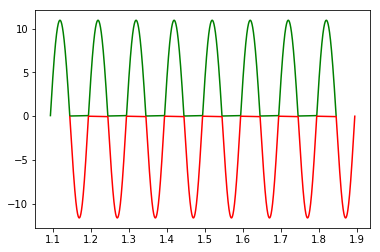

In [7]:
plt.plot(t[v>0], v[v>0], 'g-', t[v<0], v[v<0], 'r-')

In [8]:
np.sum(v[v>0])

28734.122937445973

In [9]:
np.sum(v[v<0])

-28733.946201565665

In [10]:
np.mean(v)

2.209198503598418e-05

In [11]:
np.median(v)

0.34630152520388724

In [12]:
np.max(v)

10.943648641022069

In [13]:
np.min(v)

-11.63602871998478

See circuit at CircuitLab [link](https://www.circuitlab.com/circuit/r47ydnada9qs/jk_diode_dynamic_resistance_ac_coupled/).  I reduced $R_3\times C_2$ to be 0.1 ms, and then I ran the simulation from 1ms to 2ms.  It seems that CircuitLab gives you the data starting from $t=0$ even if you ask it to simulate starting at a later time.  While doing so seems like overkill, I used a Pandas dataframe to import the CSV data and to select the desired time window.  First I coarsely selected $t > 1\,{\rm ms}$; then I used scipy.optimize.root to find a pair of zero-crossings that contained an integer number of waveform periods.  I guess this was not really needed, in retrospect, as I knew the waveform period was exactly 0.1 ms.  Anyway, it is fun to see that the sum of all of the positive samples is basically the same as the sum of all of the negative samples, i.e. the mean of the waveform is zero, even though its negative peak is larger in magnitude than its positive peak.

![](https://www.circuitlab.com/circuit/r47ydnada9qs/screenshot/540x405/)